In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
data = pd.read_csv("/content/december-april-30-9803.csv")

In [9]:
data.head()


,Date,LWP,WS,WD,RF,LUX,AirTC,AirHP,AirPP
0,"4/30/2023, 11:45:24 PM",1,0.48,wnw,0.0,0.0,27.85,85.04,1002.78
1,"4/30/2023, 11:28:14 PM",1,1.92,wnw,0.0,0.0,28.00,84.28,1003.00
2,"4/30/2023, 11:11:06 PM",1,1.44,wsw,0.0,0.0,28.15,83.42,1003.07
3,"4/30/2023, 10:54:01 PM",1,2.88,wsw,0.0,0.0,28.26,82.76,1003.45
4,"4/30/2023, 10:36:55 PM",1,0.48,wsw,0.0,0.0,28.43,81.72,1003.62


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9807 non-null   object 
 1   LWP     9807 non-null   int64  
 2   WS      9807 non-null   float64
 3   WD      9807 non-null   object 
 4   RF      9807 non-null   float64
 5   LUX     9807 non-null   float64
 6   AirTC   9807 non-null   float64
 7   AirHP   9807 non-null   float64
 8   AirPP   9807 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 689.7+ KB


In [11]:
data["Date"]=pd.to_datetime(data["Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807 entries, 0 to 9806
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9807 non-null   datetime64[ns]
 1   LWP     9807 non-null   int64         
 2   WS      9807 non-null   float64       
 3   WD      9807 non-null   object        
 4   RF      9807 non-null   float64       
 5   LUX     9807 non-null   float64       
 6   AirTC   9807 non-null   float64       
 7   AirHP   9807 non-null   float64       
 8   AirPP   9807 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 689.7+ KB


In [12]:
data.isnull().sum()

Date     0
LWP      0
WS       0
WD       0
RF       0
LUX      0
AirTC    0
AirHP    0
AirPP    0
dtype: int64

In [13]:
data["Year"]=data["Date"].dt.year
data["month"]=data["Date"].dt.month
data["day"] =data["Date"].dt.day

In [14]:
data.head()

,Date,LWP,WS,WD,RF,LUX,AirTC,AirHP,AirPP,Year,month,day
0,2023-04-30 23:45:24,1,0.48,wnw,0.0,0.0,27.85,85.04,1002.78,2023,4,30
1,2023-04-30 23:28:14,1,1.92,wnw,0.0,0.0,28.00,84.28,1003.00,2023,4,30
2,2023-04-30 23:11:06,1,1.44,wsw,0.0,0.0,28.15,83.42,1003.07,2023,4,30
3,2023-04-30 22:54:01,1,2.88,wsw,0.0,0.0,28.26,82.76,1003.45,2023,4,30
4,2023-04-30 22:36:55,1,0.48,wsw,0.0,0.0,28.43,81.72,1003.62,2023,4,30


In [15]:
def plot_vars(data,x,y,Year):
     fig =plt.subplots(figsize=(20,10))

     sns.lineplot(
       
        data = data,
        x=x,
        y=y,
        hue=Year,
       
        palette ="bright"
     )
     plt.show()

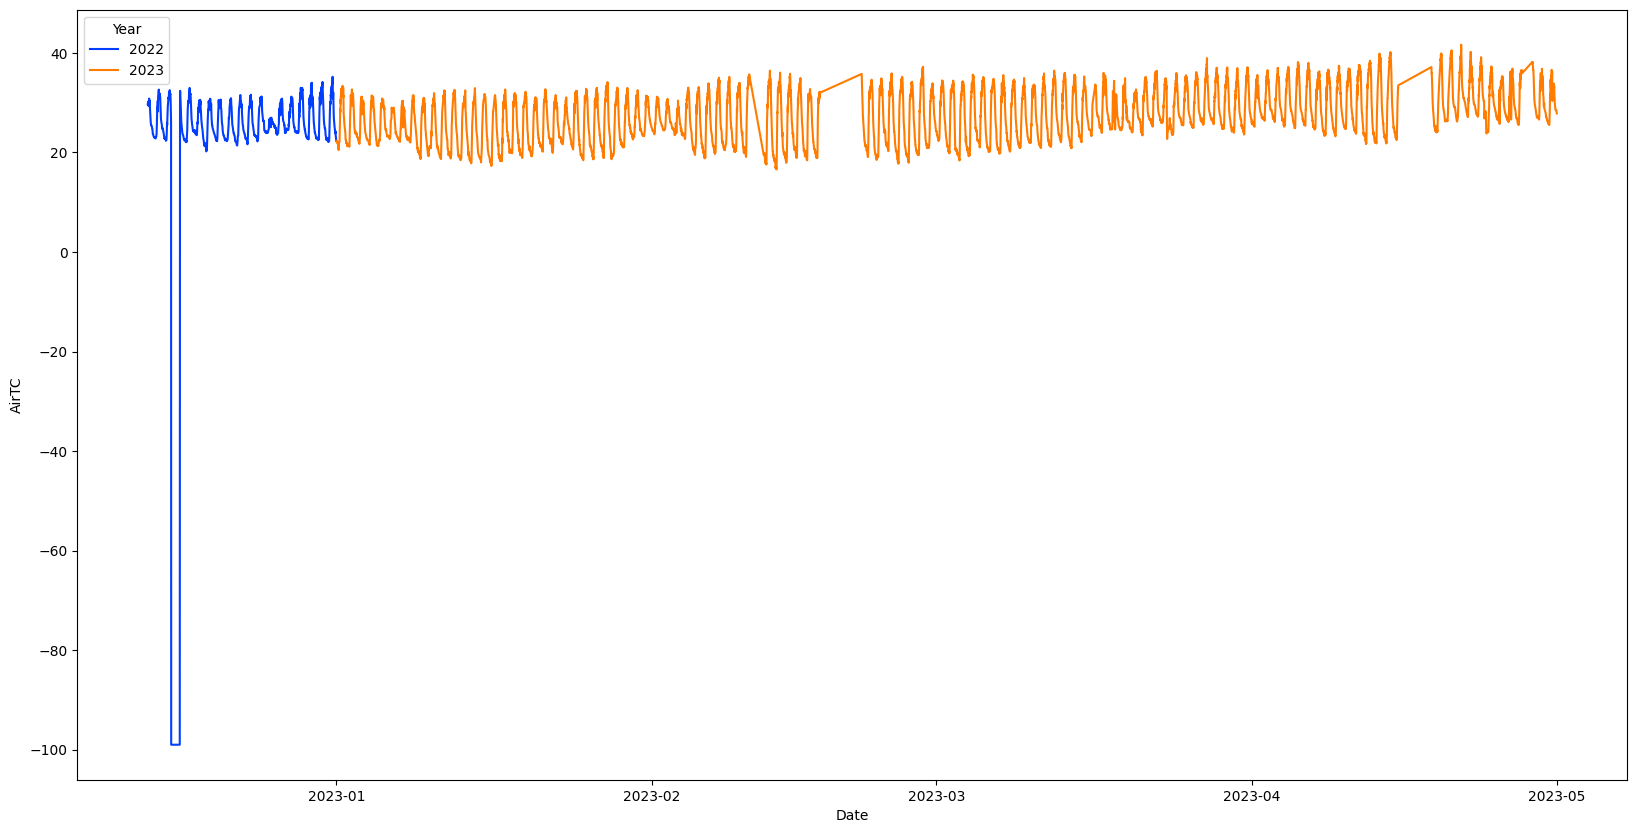

In [16]:
plot_vars(data,"Date","AirTC","Year")

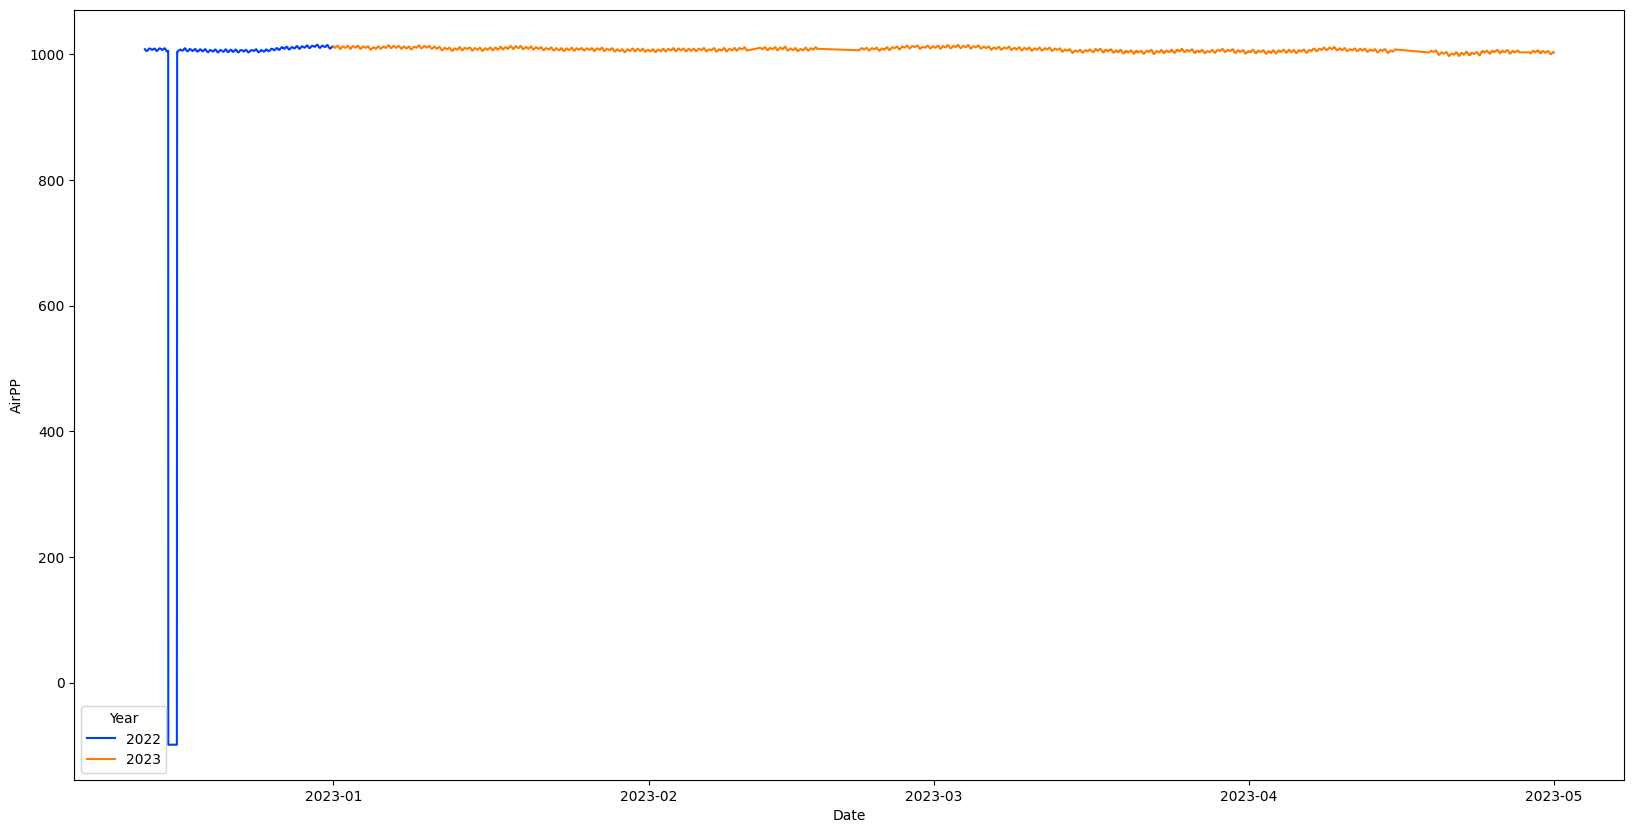

In [17]:
plot_vars(data,"Date","AirPP","Year")

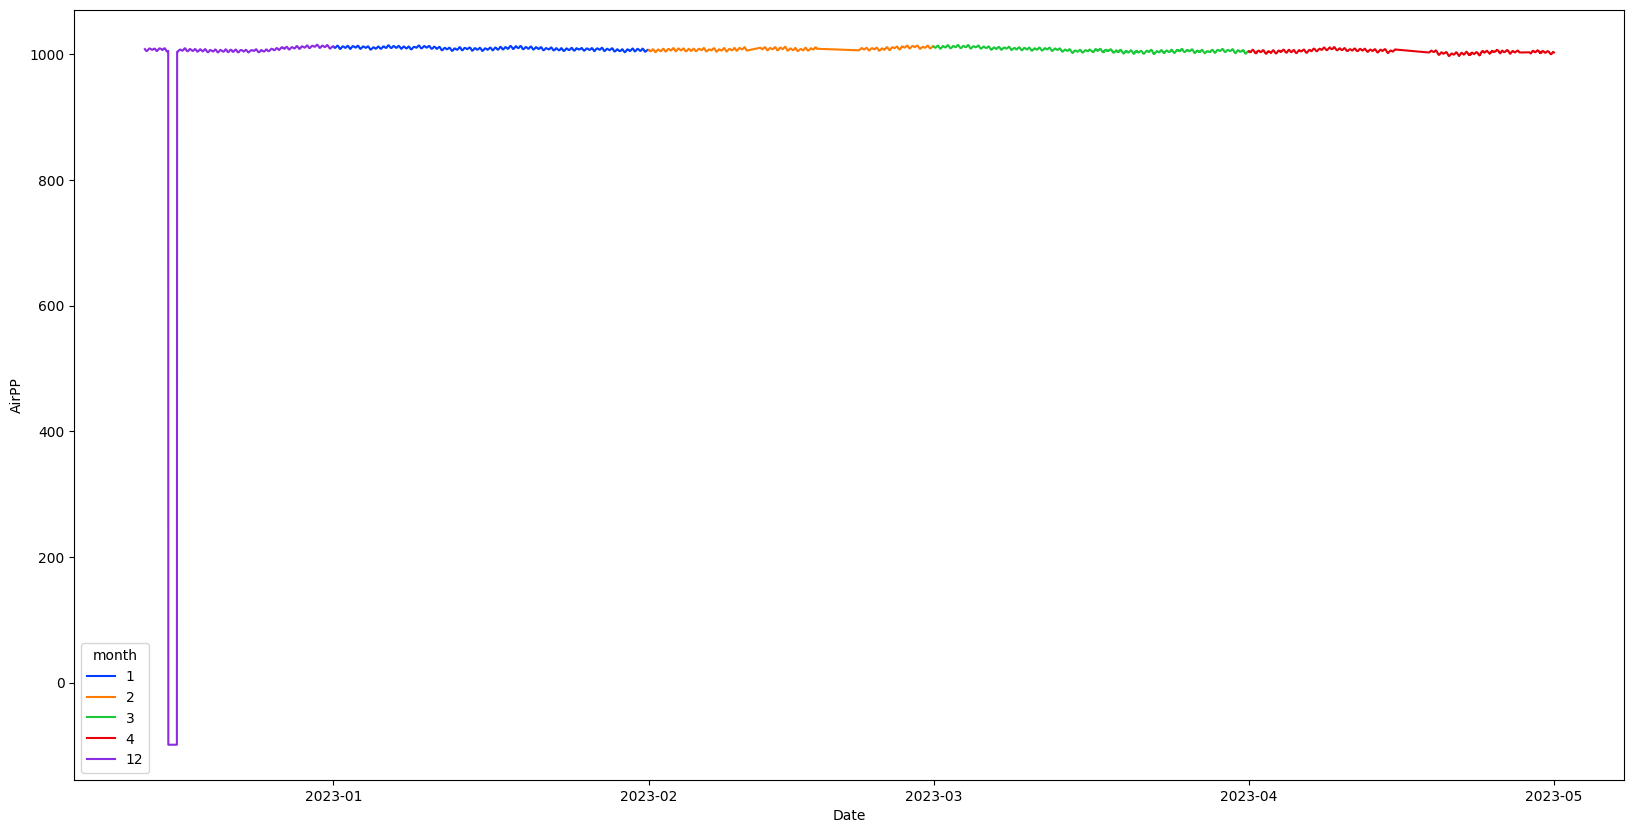

In [18]:
plot_vars(data,"Date","AirPP","month")

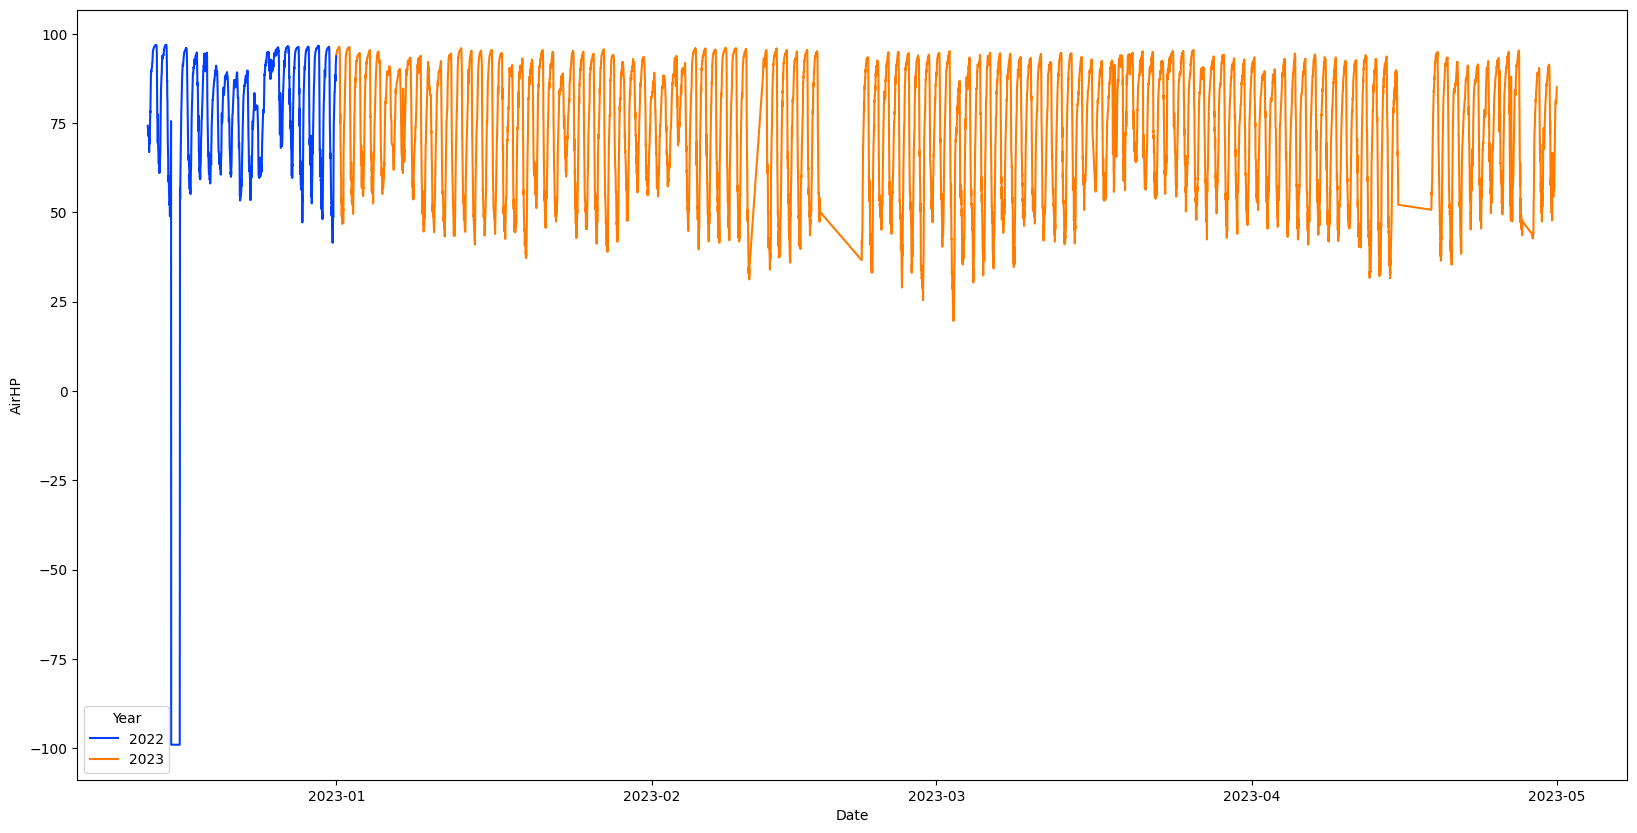

In [19]:
plot_vars(data,"Date","AirHP","Year")

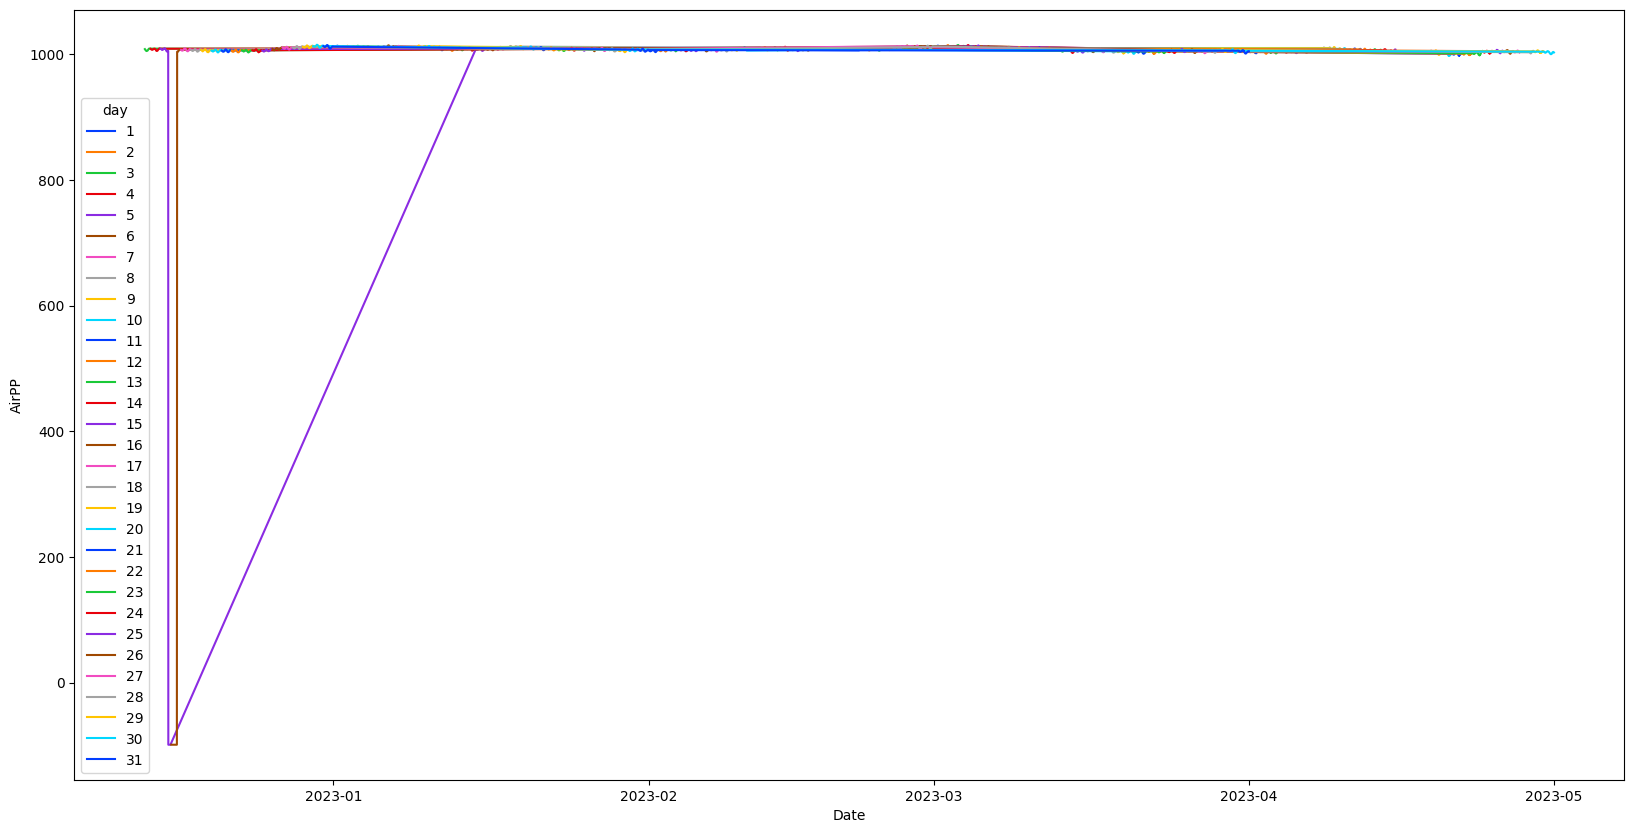

In [20]:
plot_vars(data,"Date","AirPP","day")

In [21]:
def plot_change(data,x,y,Year):
     fig =plt.subplots(figsize=(40,20))

     sns.lineplot(
       
        data = data,
        x=x,
        y=y,
        hue=Year,
       
        palette ="bright"
     )
     plt.show()

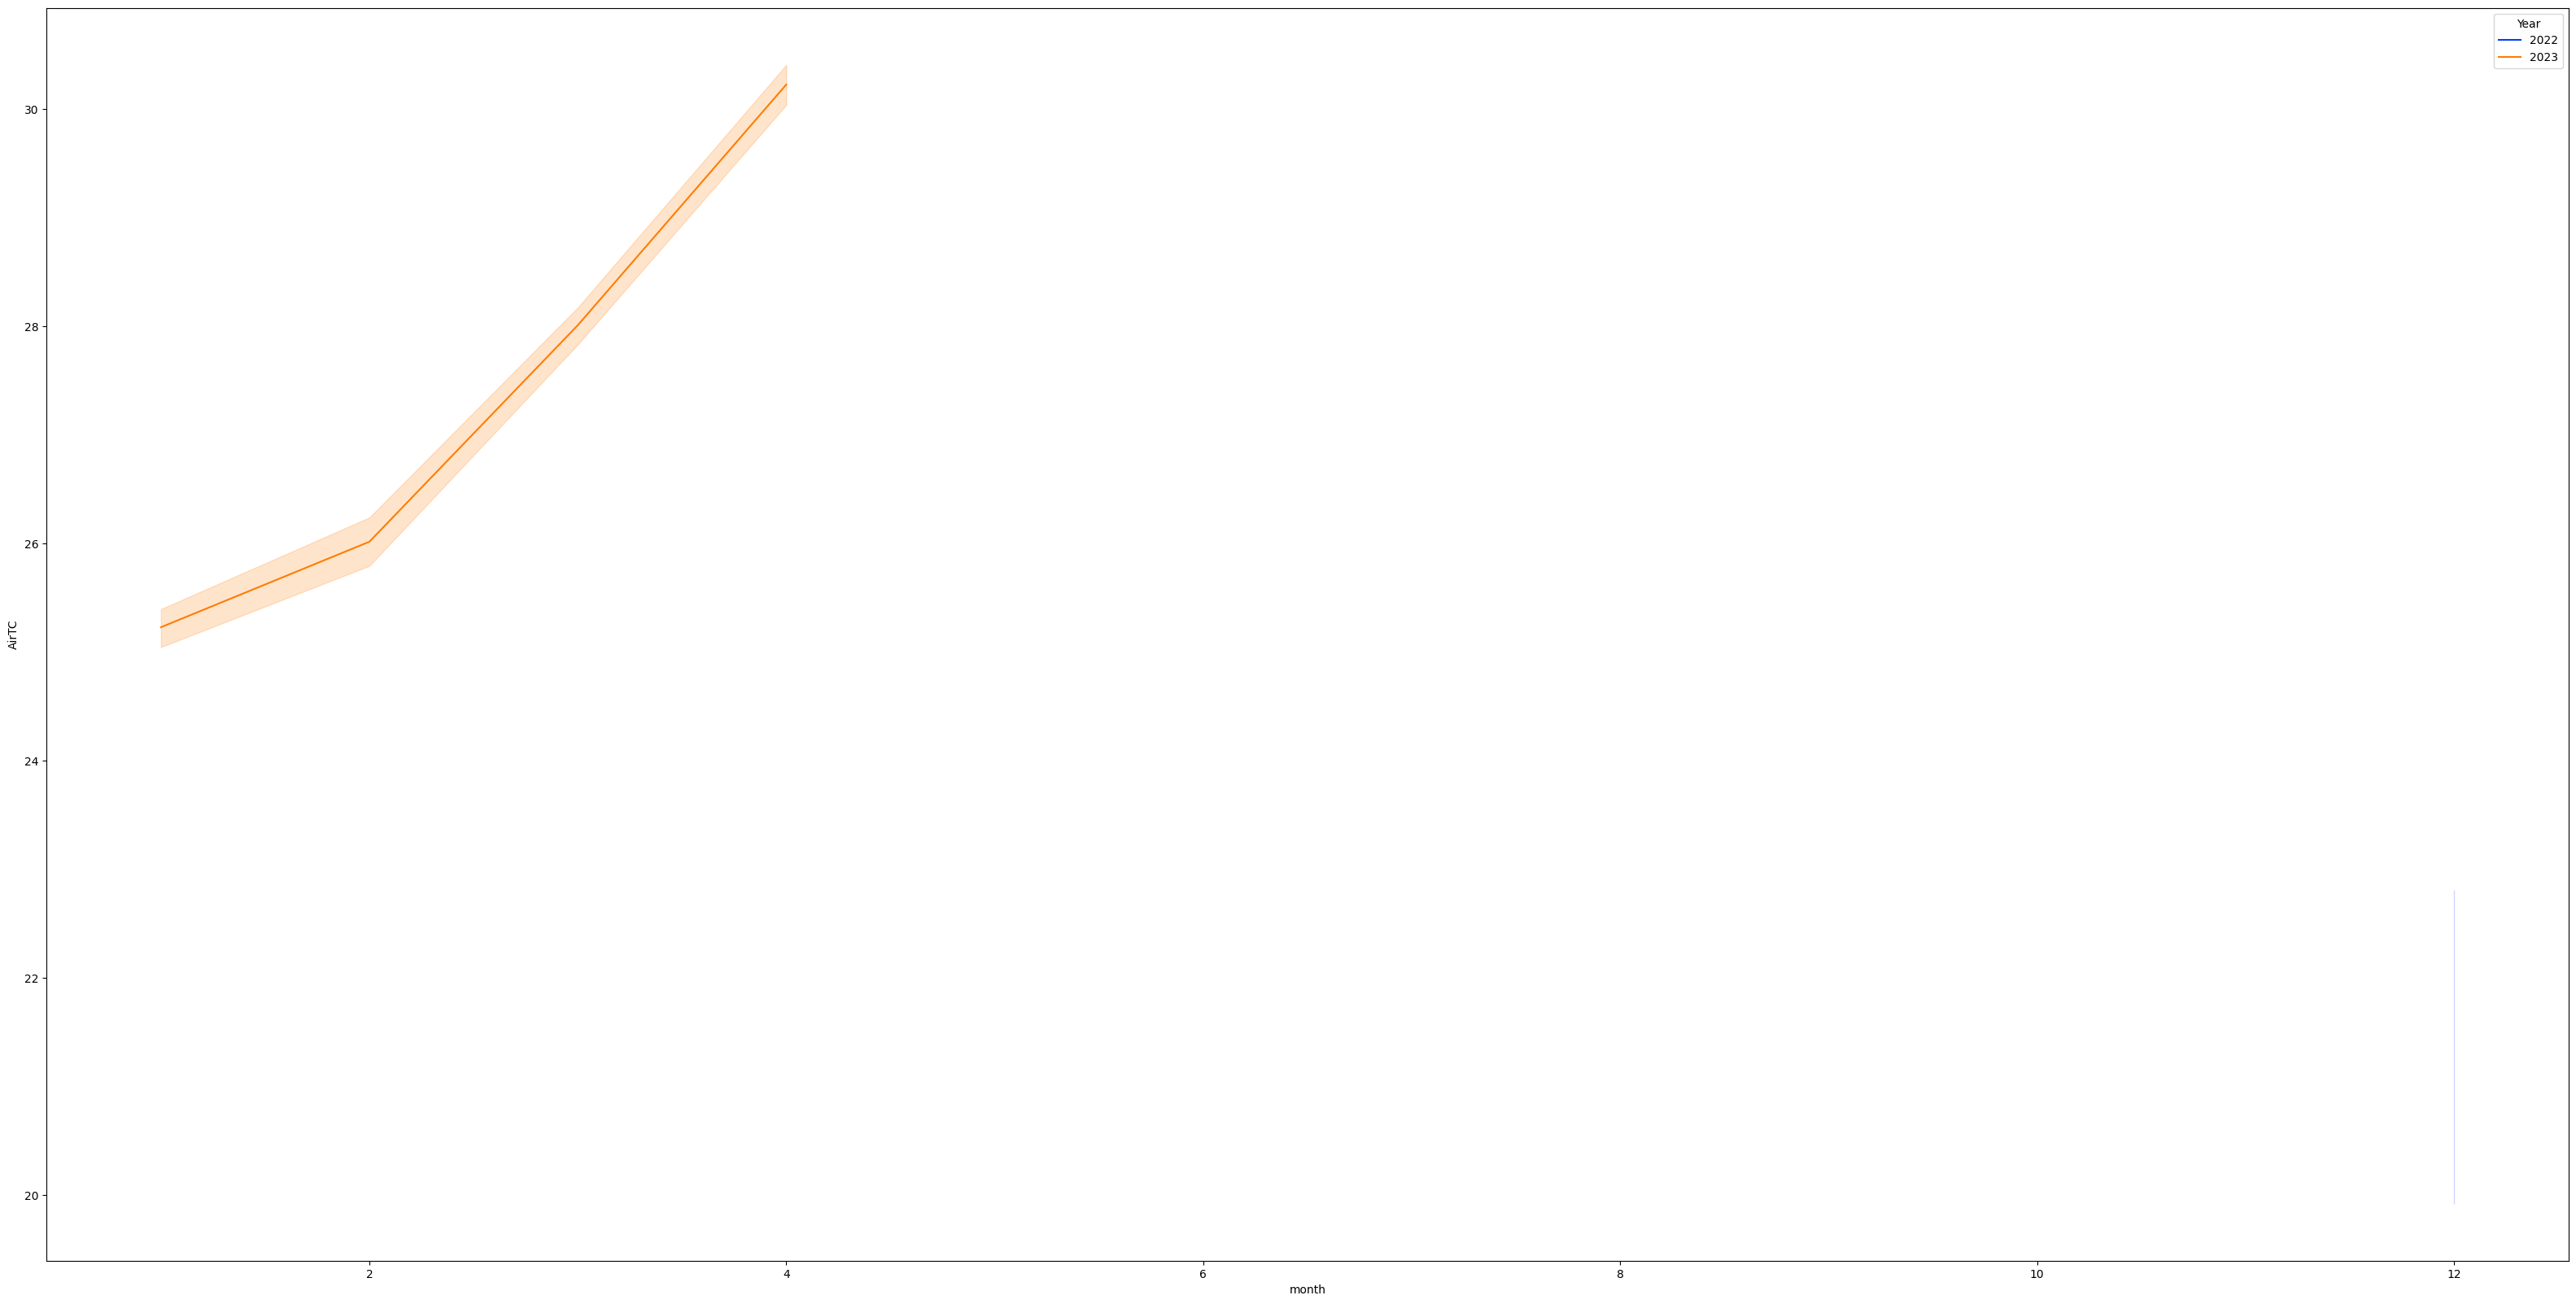

In [22]:
plot_change(data,"month","AirTC","Year")

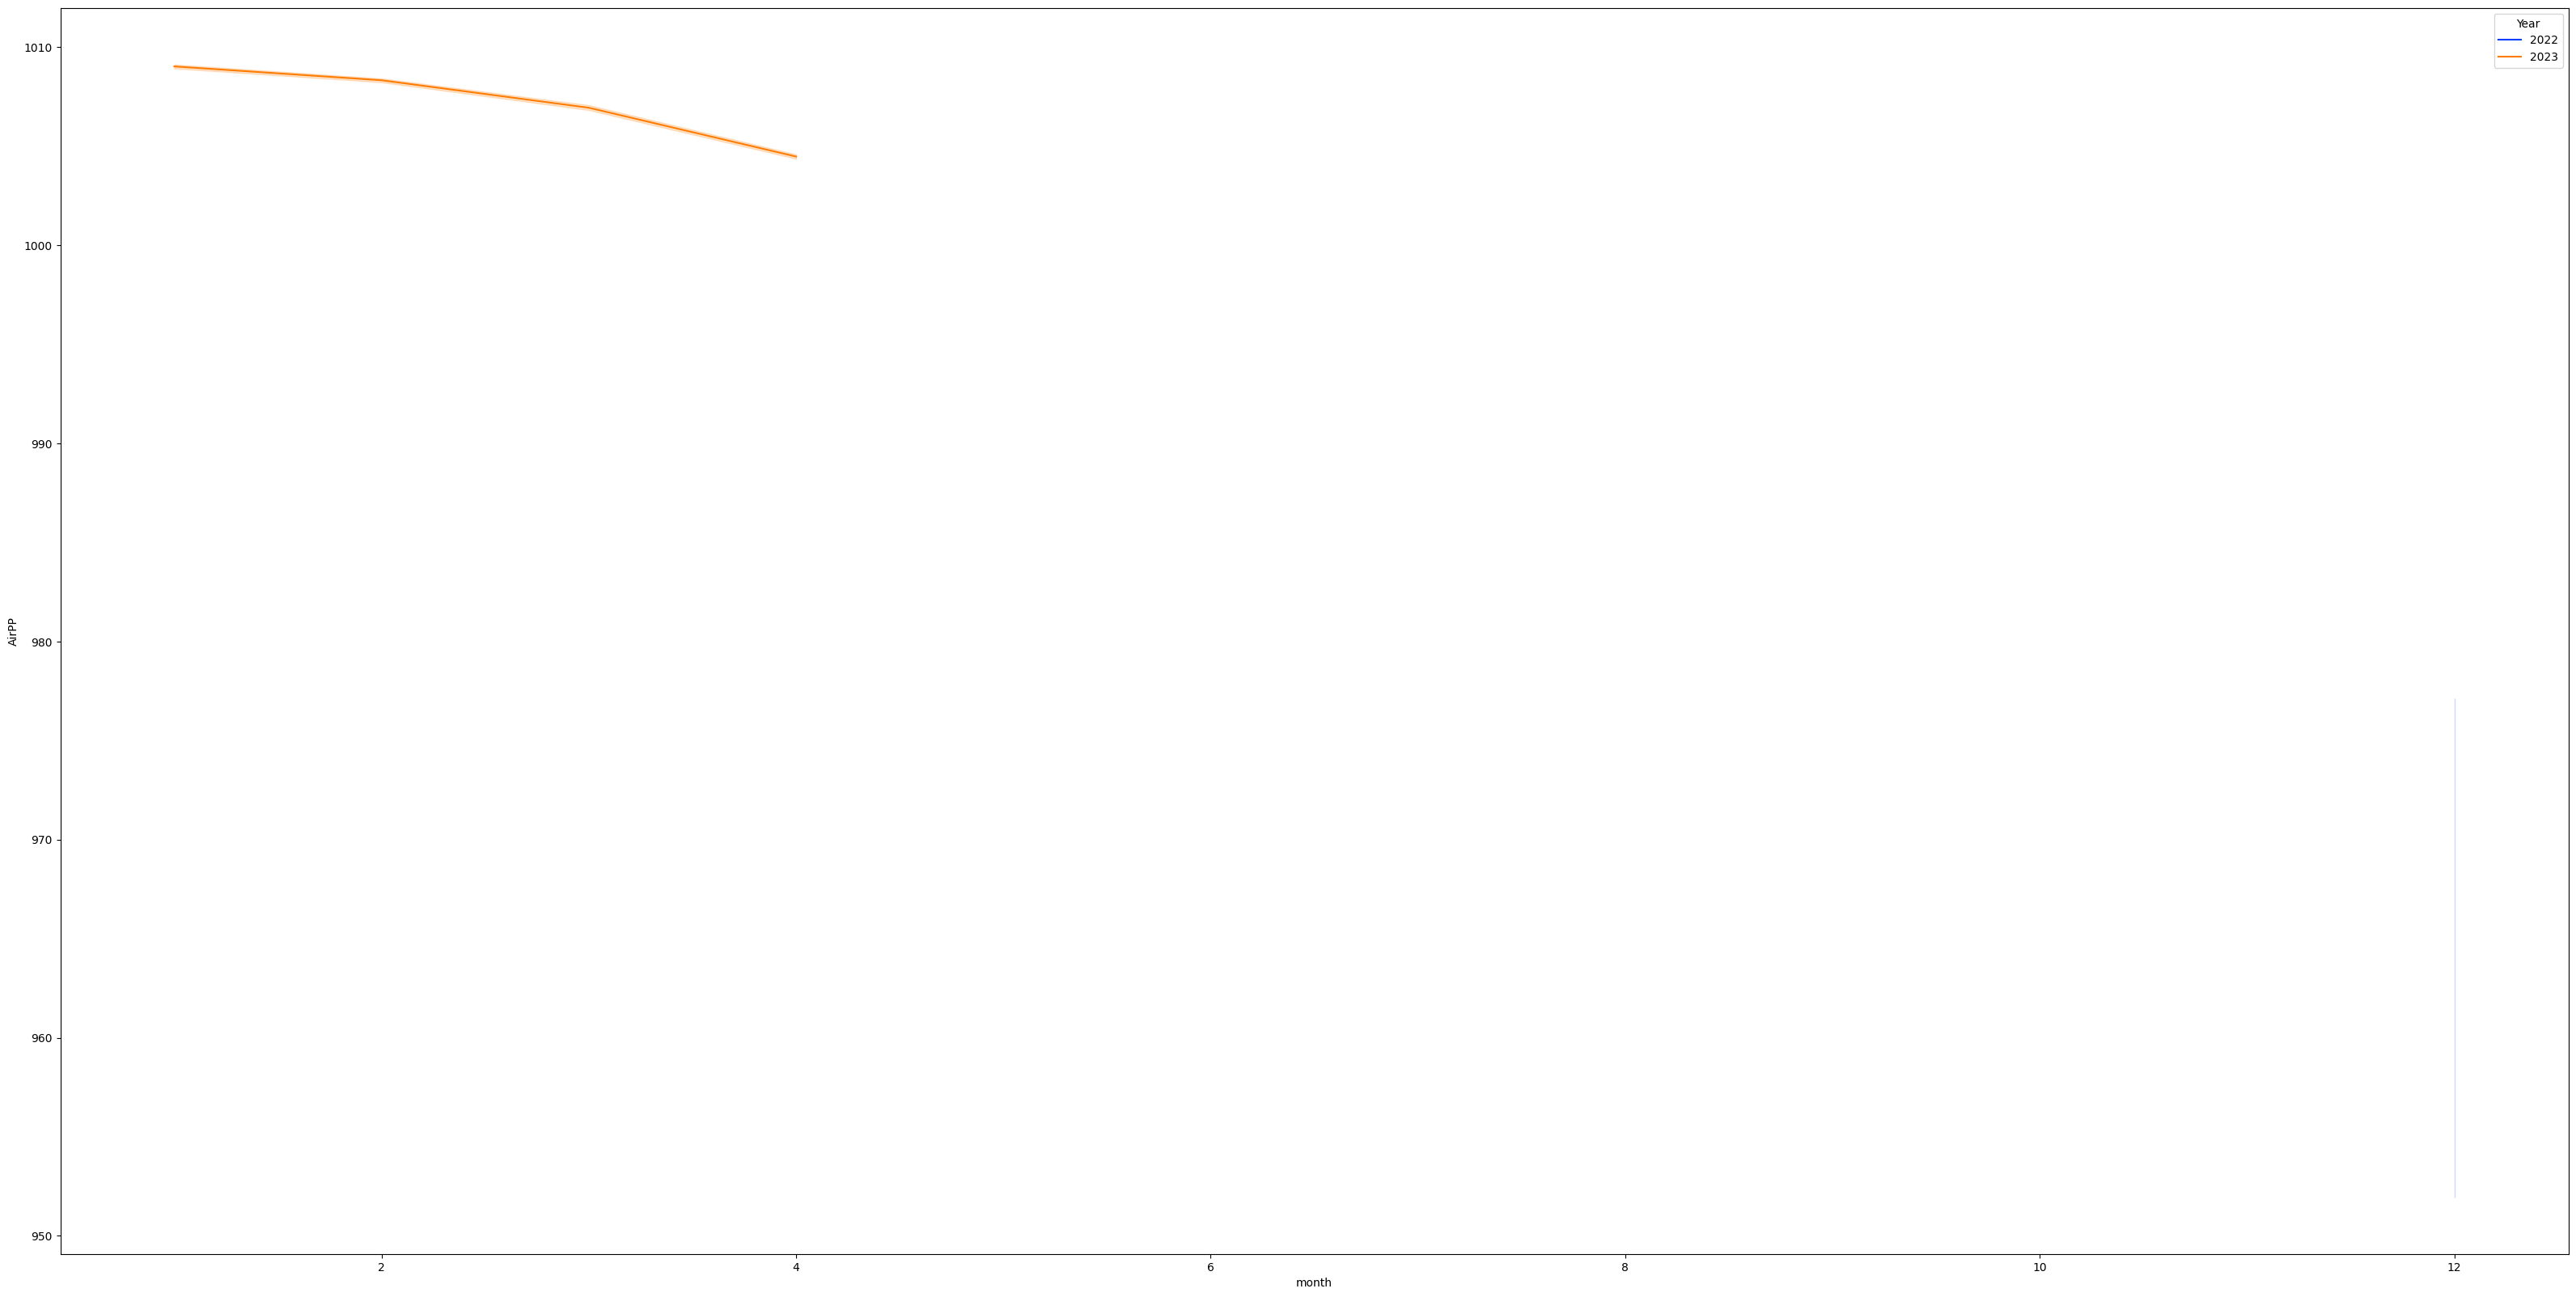

In [23]:
plot_change(data,"month","AirPP","Year")

In [24]:
def rel_temp_pp_hp(data,x,y):
     fig =plt.subplots(figsize=(40,20))

     sns.lineplot(
       
        data = data,
        x=x,
        y=y,
        size = y,
        hue=x,
       
       
        palette ="flare"
     )
     plt.show()

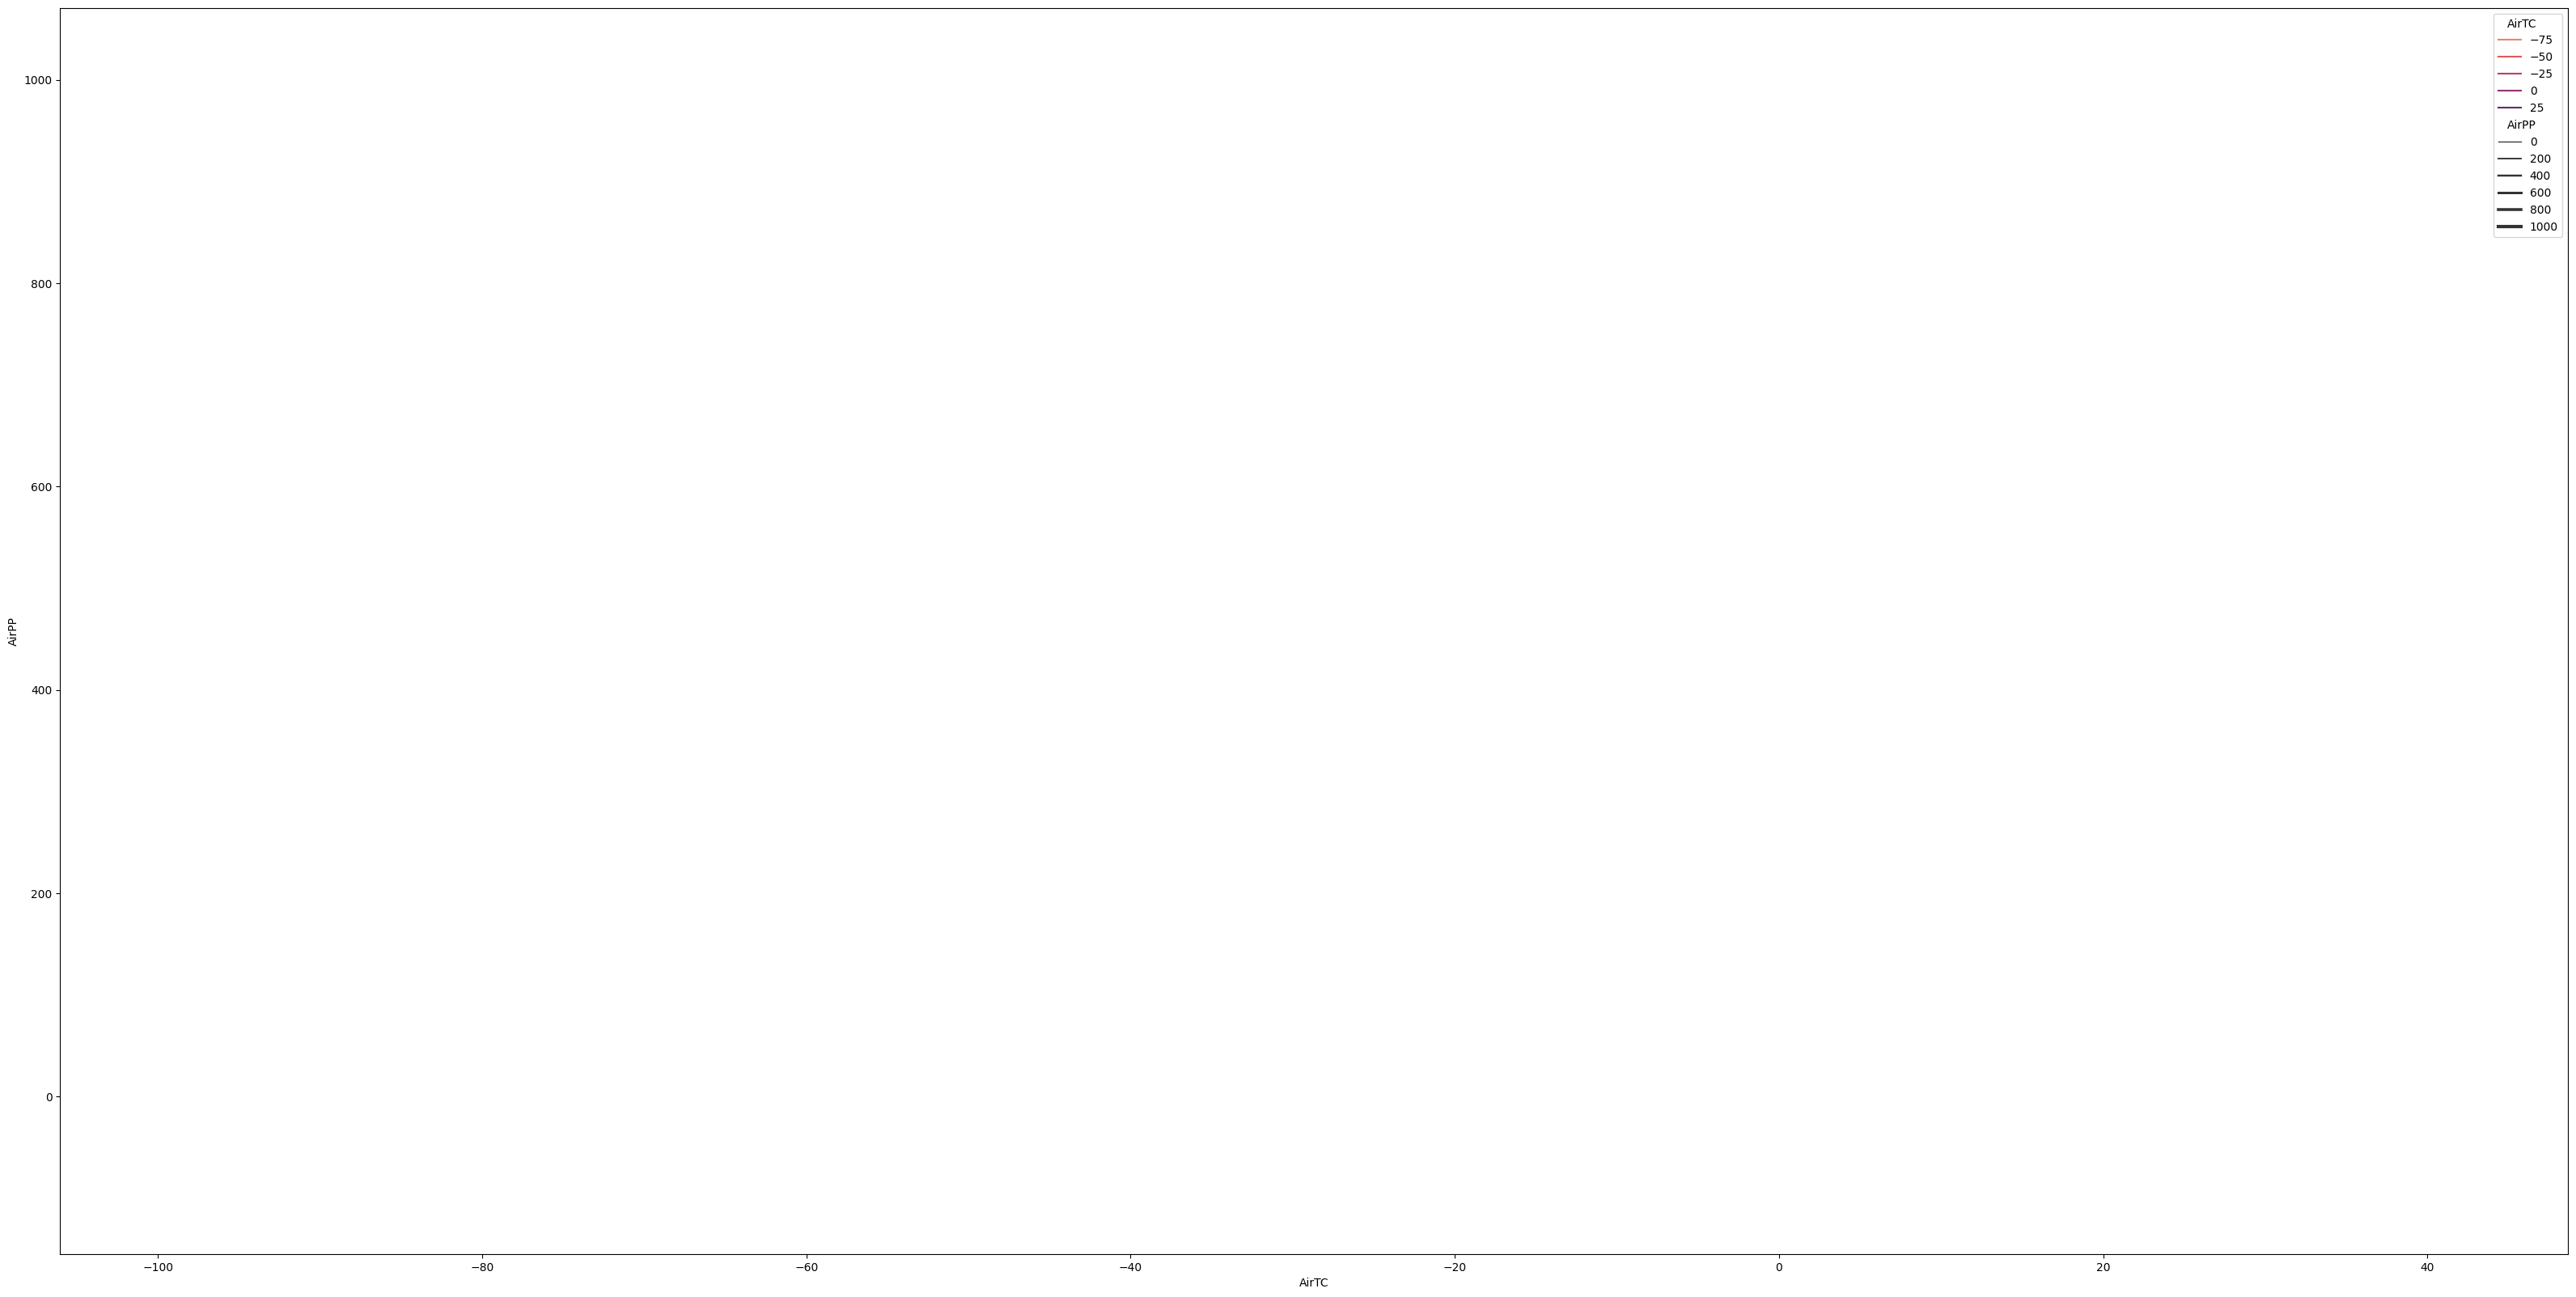

In [25]:
rel_temp_pp_hp(data,"AirTC","AirPP")

In [26]:


data['Date'] = pd.to_datetime(data['Date'])
data["temperature"] = data["AirTC"]
# Group the data by date and calculate the average value
daily_average = data.groupby(data['Date'].dt.date)['AirTC'].mean()
data1 = pd.DataFrame({'Date': daily_average.index, 'AirTC': daily_average.values})
# Print the daily average values
print(data1)

           Date      AirTC
0    2022-12-13  27.565000
1    2022-12-14  26.387556
2    2022-12-15   1.231864
3    2022-12-16 -51.916038
4    2022-12-17  26.129000
..          ...        ...
129  2023-04-26  30.388452
130  2023-04-27  30.672885
131  2023-04-28  32.146111
132  2023-04-29  30.168333
133  2023-04-30  30.089167

[134 rows x 2 columns]


In [27]:
data.corr()

<ipython-input-27-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,LWP,WS,RF,LUX,AirTC,AirHP,AirPP,Year,month,day,temperature
LWP,1.000000,-0.320328,-0.003385,-0.235175,-0.184560,0.363025,0.029575,0.074316,-0.083000,0.005835,-0.184560
WS,-0.320328,1.000000,-0.007565,0.447549,0.339294,-0.516671,0.010556,-0.033181,0.056355,0.016591,0.339294
RF,-0.003385,-0.007565,1.000000,-0.006958,-0.129776,-0.082454,-0.148511,-0.029431,0.027818,0.000025,-0.129776
LUX,-0.235175,0.447549,-0.006958,1.000000,0.390598,-0.585196,0.045688,0.061575,-0.034295,-0.006586,0.390598
AirTC,-0.184560,0.339294,-0.129776,0.390598,1.000000,0.132185,0.863860,0.197376,-0.128407,0.027781,1.000000
AirHP,0.363025,-0.516671,-0.082454,-0.585196,0.132185,1.000000,0.561329,0.004653,-0.017265,0.049818,0.132185
AirPP,0.029575,0.010556,-0.148511,0.045688,0.863860,0.561329,1.000000,0.182668,-0.179540,-0.003431,0.863860
Year,0.074316,-0.033181,-0.029431,0.061575,0.197376,0.004653,0.182668,1.000000,-0.945990,-0.257615,0.197376
month,-0.083000,0.056355,0.027818,-0.034295,-0.128407,-0.017265,-0.179540,-0.945990,1.000000,0.226467,-0.128407
day,0.005835,0.016591,0.000025,-0.006586,0.027781,0.049818,-0.003431,-0.257615,0.226467,1.000000,0.027781


In [28]:
forecast_data = data1.rename(columns={"Date":"d","AirTC":"t"})

In [29]:
forecast_data.head()

,d,t
0,2022-12-13,27.565000
1,2022-12-14,26.387556
2,2022-12-15,1.231864
3,2022-12-16,-51.916038
4,2022-12-17,26.129000


In [30]:
ndata = data1

In [36]:
ndata.head()

,Date,AirTC
0,2022-12-13,27.565000
1,2022-12-14,26.387556
2,2022-12-15,1.231864
3,2022-12-16,-51.916038
4,2022-12-17,26.129000


In [32]:
ndata.tail()

,Date,AirTC
129,2023-04-26,30.388452
130,2023-04-27,30.672885
131,2023-04-28,32.146111
132,2023-04-29,30.168333
133,2023-04-30,30.089167


#ARIMA MODEL

In [35]:
ndata = ndata.drop(columns=["LWP","WS","RF","LUX","Year","month","day",])

KeyError: ignored

In [37]:
ndata =ndata.set_index("Date")

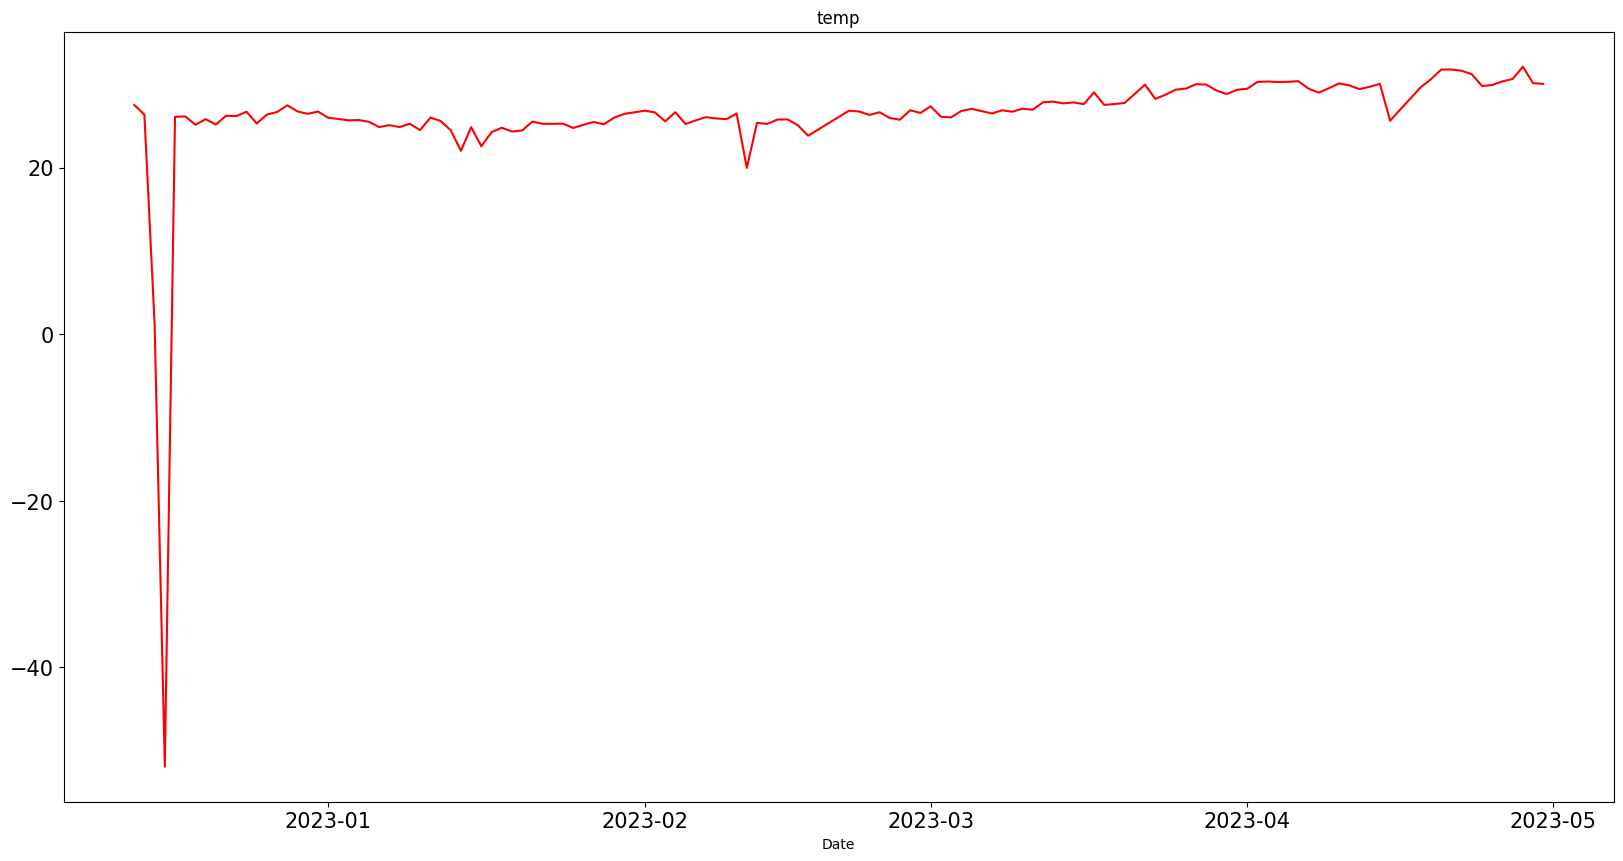

In [38]:
plt.figure(figsize =(20,10))
ndata.AirTC.plot(title="temp",fontsize=15,color="red")
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller 
def sdf_test(ndata):
  ndatatest = adfuller(ndata,autolag ="AIC")
  print("1.ADF:",ndatatest[0])
  print("2.P-value:",ndatatest[1])
  print("3.num_of_lags",ndatatest[2])
  print("4.num_of_observation:",ndatatest[3])
  print("5.crtical values:")
  for key,val in ndatatest[4].items():
    print("\t",key,": ",val)

In [40]:
sdf_test(ndata["AirTC"])

1.ADF: -1.8536645991333005
2.P-value: 0.3541625921300878
3.num_of_lags 5
4.num_of_observation: 128
5.crtical values:
	 1% :  -3.4825006939887997
	 5% :  -2.884397984161377
	 10% :  -2.578960197753906


In [41]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.1 MB/s eta 0:00:00


In [42]:
from pmdarima import auto_arima
arimadata = auto_arima(ndata["AirTC"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=952.560, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=942.619, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=950.561, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=929.556, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=901.265, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=900.984, Time=0.35 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=902.608, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=902.412, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=900.532, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=900.116, Time=0.07 sec
 A

In [43]:
import statsmodels.api as sm

In [44]:
train=ndata.iloc[:100]
test=ndata.iloc[100:]
print(train.shape,test.shape)
print(ndata.shape)


(100, 1) (34, 1)
(134, 1)


In [47]:
model = sm.tsa.arima.ARIMA(train["AirTC"],order=(2,1,1))
model = model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  AirTC   No. Observations:                  100
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -346.100
Date:                Sun, 28 May 2023   AIC                            700.201
Time:                        19:08:45   BIC                            710.581
Sample:                             0   HQIC                           704.401
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2455      0.043      5.721      0.000       0.161       0.330
ar.L2         -0.1617      0.089     -1.818      0.069      -0.336       0.013
ma.L1         -0.9162      0.141     -6.481      0.000      -1.193      -0.639
sigma2        62.5815      7.421      8.433      0.000      48.036      77.127
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4756.64
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -3.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
start = len(train)
end = len(train)+len(test)-1
pred=model.predict(start=start,end =end,typ="levels").rename("ARIMA predictions")
pred.index = ndata.index[start:end+1]
print(pred)
pred.dtypes

Date
2023-03-26    28.106602
2023-03-27    27.692722
2023-03-28    27.798870
2023-03-29    27.891863
2023-03-30    27.897522
2023-03-31    27.883871
2023-04-01    27.879605
2023-04-02    27.880766
2023-04-03    27.881740
2023-04-04    27.881792
2023-04-05    27.881647
2023-04-06    27.881603
2023-04-07    27.881616
2023-04-08    27.881626
2023-04-09    27.881626
2023-04-10    27.881625
2023-04-11    27.881624
2023-04-12    27.881625
2023-04-13    27.881625
2023-04-14    27.881625
2023-04-15    27.881625
2023-04-18    27.881625
2023-04-19    27.881625
2023-04-20    27.881625
2023-04-21    27.881625
2023-04-22    27.881625
2023-04-23    27.881625
2023-04-24    27.881625
2023-04-25    27.881625
2023-04-26    27.881625
2023-04-27    27.881625
2023-04-28    27.881625
2023-04-29    27.881625
2023-04-30    27.881625
Name: ARIMA predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


dtype('float64')

<Axes: xlabel='Date'>

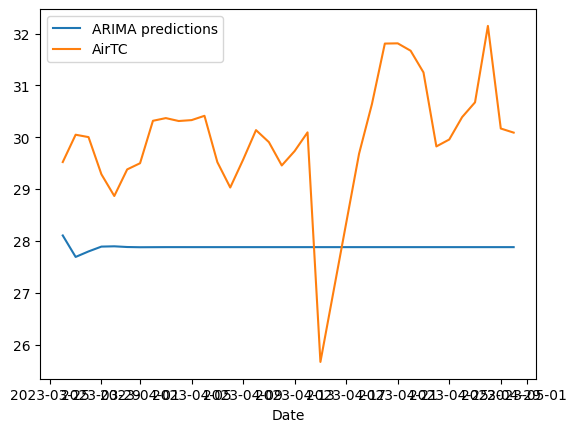

In [49]:
pred.plot(legend = True)
test["AirTC"].plot(legend =True)

In [50]:
test["AirTC"].mean()

30.046069867982666

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [52]:
rmse=sqrt(mean_squared_error(pred,test["AirTC"]))

In [53]:
rmse

2.4262278111061946

In [54]:
model2 = sm.tsa.arima.ARIMA(ndata["AirTC"],order=(4,1,0))
model2=model2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [55]:
future_dates = pd.date_range(start="2023-05-01",end="2023-05-30")
print(future_dates)

DatetimeIndex(['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20',
               '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28',
               '2023-05-29', '2023-05-30'],
              dtype='datetime64[ns]', freq='D')


In [56]:
pred = model2.predict(start=len(ndata),end=len(ndata)+29,types="levels").rename("Arima Prediction")
pred.index = future_dates
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2023-05-01    30.482030
2023-05-02    31.111929
2023-05-03    31.224840
2023-05-04    30.419115
2023-05-05    30.270522
2023-05-06    30.655000
2023-05-07    31.041093
2023-05-08    30.912172
2023-05-09    30.488508
2023-05-10    30.444314
2023-05-11    30.736715
2023-05-12    30.927319
2023-05-13    30.774893
2023-05-14    30.540662
2023-05-15    30.562893
2023-05-16    30.760188
2023-05-17    30.838015
2023-05-18    30.711783
2023-05-19    30.587641
2023-05-20    30.633938
2023-05-21    30.756911
2023-05-22    30.777392
2023-05-23    30.685770
2023-05-24    30.625666
2023-05-25    30.672793
2023-05-26    30.744289
2023-05-27    30.739358
2023-05-28    30.678215
2023-05-29    30.653431
2023-05-30    30.692029
Freq: D, Name: Arima Prediction, dtype: float64

In [60]:
pred.to_excel("pred.xlsx",index = False)
from google.colab import files

# Specify the file path of the Excel file
file_path = "pred.xlsx"

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

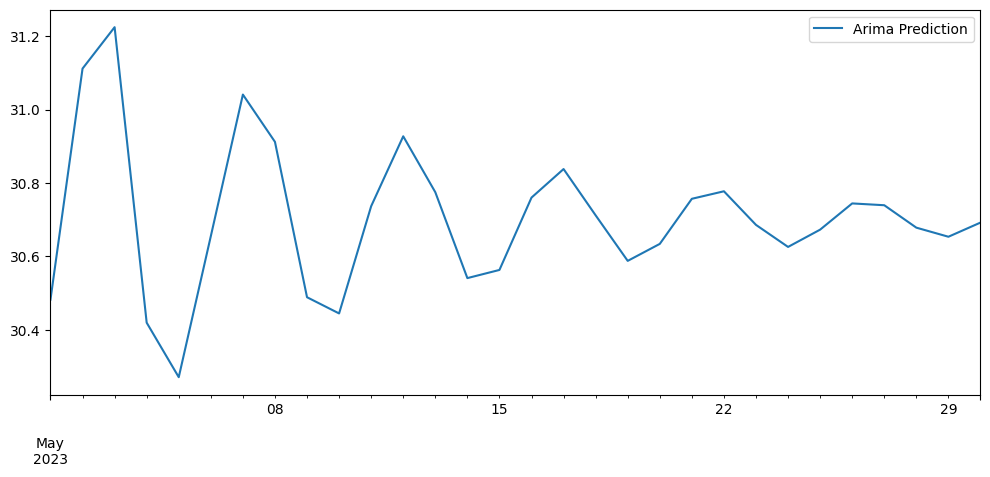

In [59]:
pred.plot(figsize=(12,5),legend=True)

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC":"temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Define the features and target variables
X = dates.to_frame().reset_index(drop=True)
y = temperature

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Fit the model to the entire dataset
model.fit(X, y)

# Generate predictions for the month of May
may_dates = pd.date_range(start="2023-05-01", end="2023-05-30", freq="D")
X_may = may_dates.to_frame().reset_index(drop=True)
y_pred_may = model.predict(X_may)

# Print the forecasted dates and temperatures for May
for date, temperature in zip(may_dates, y_pred_may):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")

# Calculate the Mean Squared Error for the entire dataset
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Date: 2023-05-01, Temperature: 27.93
Date: 2023-05-02, Temperature: 27.93
Date: 2023-05-03, Temperature: 27.93
Date: 2023-05-04, Temperature: 27.93
Date: 2023-05-05, Temperature: 27.93
Date: 2023-05-06, Temperature: 27.93
Date: 2023-05-07, Temperature: 27.93
Date: 2023-05-08, Temperature: 27.93
Date: 2023-05-09, Temperature: 27.93
Date: 2023-05-10, Temperature: 27.93
Date: 2023-05-11, Temperature: 27.93
Date: 2023-05-12, Temperature: 27.93
Date: 2023-05-13, Temperature: 27.93
Date: 2023-05-14, Temperature: 27.93
Date: 2023-05-15, Temperature: 27.93
Date: 2023-05-16, Temperature: 27.93
Date: 2023-05-17, Temperature: 27.93
Date: 2023-05-18, Temperature: 27.93
Date: 2023-05-19, Temperature: 27.93
Date: 2023-05-20, Temperature: 27.93
Date: 2023-05-21, Temperature: 27.93
Date: 2023-05-22, Temperature: 27.93
Date: 2023-05-23, Temperature: 27.93
Date: 2023-05-24, Temperature: 27.93
Date: 2023-05-25, Temperature: 27.93
Date: 2023-05-26, Temperature: 27.93
Date: 2023-05-27, Temperature: 27.93
D

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Define the features and target variables
X = dates.to_frame().reset_index(drop=True)
y = temperature

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Fit the model to the dataset
model.fit(X, y)

# Generate predictions for the month of May
may_dates = pd.date_range(start="2023-05-01", end="2023-05-30", freq="D")
X_may = may_dates.to_frame().reset_index(drop=True)

# Predict temperatures for the next date when dataset ends
X_last_date = X.iloc[[-1]].copy()
next_date = X_last_date.iloc[0, 0] + pd.DateOffset(days=1)
X_last_date.iloc[0, 0] = next_date
X_may = pd.concat([X_may, X_last_date])

X_may_numeric = X_may.iloc[:, 0].values.reshape(-1, 1)
y_pred_may = model.predict(X_may_numeric[:-1])

# Print the forecasted dates and temperatures for May
for date, temperature in zip(may_dates, y_pred_may):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")

# Calculate the Mean Squared Error for the entire dataset
y_pred = model.predict(X.values)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Date: 2023-05-01, Temperature: 27.92
Date: 2023-05-02, Temperature: 27.92
Date: 2023-05-03, Temperature: 27.92
Date: 2023-05-04, Temperature: 27.92
Date: 2023-05-05, Temperature: 27.92
Date: 2023-05-06, Temperature: 27.92
Date: 2023-05-07, Temperature: 27.92
Date: 2023-05-08, Temperature: 27.92
Date: 2023-05-09, Temperature: 27.92
Date: 2023-05-10, Temperature: 27.92
Date: 2023-05-11, Temperature: 27.92
Date: 2023-05-12, Temperature: 27.92
Date: 2023-05-13, Temperature: 27.92
Date: 2023-05-14, Temperature: 27.92
Date: 2023-05-15, Temperature: 27.92
Date: 2023-05-16, Temperature: 27.92
Date: 2023-05-17, Temperature: 27.92
Date: 2023-05-18, Temperature: 27.92
Date: 2023-05-19, Temperature: 27.92
Date: 2023-05-20, Temperature: 27.92
Date: 2023-05-21, Temperature: 27.92
Date: 2023-05-22, Temperature: 27.92
Date: 2023-05-23, Temperature: 27.92
Date: 2023-05-24, Temperature: 27.92
Date: 2023-05-25, Temperature: 27.92
Date: 2023-05-26, Temperature: 27.92
Date: 2023-05-27, Temperature: 27.92
D

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Define the features and target variables
X = dates.to_frame().reset_index(drop=True)
y = temperature

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Fit the model to the dataset
model.fit(X, y)

# Generate predictions for the month of May
may_dates = pd.date_range(start="2023-05-01", end="2023-05-30", freq="D")
X_may = may_dates.to_frame().reset_index(drop=True)

# Predict temperatures for the next date when dataset ends
X_last_date = X.iloc[[-1]].copy()
next_date = X_last_date.iloc[0, 0] + pd.DateOffset(days=1)
X_last_date.iloc[0, 0] = next_date
X_may = pd.concat([X_may, X_last_date])

X_may_numeric = X_may.iloc[:, 0].values.reshape(-1, 1)
y_pred_may = model.predict(X_may_numeric[:-1])

# Print the forecasted dates and temperatures for May
for date, temperature in zip(may_dates, y_pred_may):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")

# Calculate the Mean Squared Error for the entire dataset
y_pred = model.predict(X.values)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Date: 2023-05-01, Temperature: 27.92
Date: 2023-05-02, Temperature: 27.92
Date: 2023-05-03, Temperature: 27.92
Date: 2023-05-04, Temperature: 27.92
Date: 2023-05-05, Temperature: 27.92
Date: 2023-05-06, Temperature: 27.92
Date: 2023-05-07, Temperature: 27.92
Date: 2023-05-08, Temperature: 27.92
Date: 2023-05-09, Temperature: 27.92
Date: 2023-05-10, Temperature: 27.92
Date: 2023-05-11, Temperature: 27.92
Date: 2023-05-12, Temperature: 27.92
Date: 2023-05-13, Temperature: 27.92
Date: 2023-05-14, Temperature: 27.92
Date: 2023-05-15, Temperature: 27.92
Date: 2023-05-16, Temperature: 27.92
Date: 2023-05-17, Temperature: 27.92
Date: 2023-05-18, Temperature: 27.92
Date: 2023-05-19, Temperature: 27.92
Date: 2023-05-20, Temperature: 27.92
Date: 2023-05-21, Temperature: 27.92
Date: 2023-05-22, Temperature: 27.92
Date: 2023-05-23, Temperature: 27.92
Date: 2023-05-24, Temperature: 27.92
Date: 2023-05-25, Temperature: 27.92
Date: 2023-05-26, Temperature: 27.92
Date: 2023-05-27, Temperature: 27.92
D

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Define the features and target variables
X = dates.to_frame().reset_index(drop=True)
y = temperature

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Fit the model to the dataset
model.fit(X, y)

# Generate predictions for the month of May
may_dates = pd.date_range(start="2023-05-01", end="2023-05-31", freq="D")
X_may = may_dates.to_frame().reset_index(drop=True)

# Predict temperatures for each date in May
for i in range(len(may_dates)):
    X_may_numeric = X_may.iloc[:i+1, 0].values.reshape(-1, 1)
    y_pred_may = model.predict(X_may_numeric)

    date = may_dates[i]
    temperature = y_pred_may[-1]

    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")

# Calculate the Mean Squared Error for the entire dataset
y_pred = model.predict(X.values)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Date: 2023-05-01, Temperature: 27.94
Date: 2023-05-02, Temperature: 27.94
Date: 2023-05-03, Temperature: 27.94
Date: 2023-05-04, Temperature: 27.94
Date: 2023-05-05, Temperature: 27.94
Date: 2023-05-06, Temperature: 27.94
Date: 2023-05-07, Temperature: 27.94
Date: 2023-05-08, Temperature: 27.94
Date: 2023-05-09, Temperature: 27.94
Date: 2023-05-10, Temperature: 27.94
Date: 2023-05-11, Temperature: 27.94


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Date: 2023-05-12, Temperature: 27.94
Date: 2023-05-13, Temperature: 27.94
Date: 2023-05-14, Temperature: 27.94
Date: 2023-05-15, Temperature: 27.94
Date: 2023-05-16, Temperature: 27.94
Date: 2023-05-17, Temperature: 27.94
Date: 2023-05-18, Temperature: 27.94
Date: 2023-05-19, Temperature: 27.94
Date: 2023-05-20, Temperature: 27.94
Date: 2023-05-21, Temperature: 27.94
Date: 2023-05-22, Temperature: 27.94
Date: 2023-05-23, Temperature: 27.94
Date: 2023-05-24, Temperature: 27.94
Date: 2023-05-25, Temperature: 27.94
Date: 2023-05-26, Temperature: 27.94
Date: 2023-05-27, Temperature: 27.94
Date: 2023-05-28, Temperature: 27.94
Date: 2023-05-29, Temperature: 27.94
Date: 2023-05-30, Temperature: 27.94


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Date: 2023-05-31, Temperature: 27.94
Mean Squared Error: 0.2112555017028655


In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Define the features and target variables
X = dates.to_frame().reset_index(drop=True)
y = temperature

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Fit the model to the dataset
model.fit(X, y)

# Generate predictions for the month of May
may_dates = pd.date_range(start="2023-05-01", end="2023-05-31", freq="D")
X_may = may_dates.to_frame().reset_index(drop=True)

# Predict temperatures for each date in May
X_may_numeric = X.append(X_may)
y_pred_may = model.predict(X_may_numeric)

# Retrieve the predicted temperatures for May
y_pred_may = y_pred_may[-len(may_dates):]

# Print the forecasted dates and temperatures for May
for i in range(len(may_dates)):
    date = may_dates[i]
    temperature = y_pred_may[i]

    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")

# Calculate the Mean Squared Error for the entire dataset
y_pred = model.predict(X.values)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


<ipython-input-69-ad40926c5741>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_may_numeric = X.append(X_may)


TypeError: ignored

In [70]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Define the features and target variables
X = dates.to_frame().reset_index(drop=True)
y = temperature

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Fit the model to the dataset
model.fit(X, y)

# Generate predictions for the month of May
may_dates = pd.date_range(start="2023-05-01", end="2023-05-31", freq="D")
X_may = may_dates.to_frame().reset_index(drop=True)

# Concatenate X and X_may
X_combined = pd.concat([X, X_may])

# Predict temperatures for each date in X_combined
y_pred_combined = model.predict(X_combined)

# Retrieve the predicted temperatures for May
y_pred_may = y_pred_combined[-len(may_dates):]

# Print the forecasted dates and temperatures for May
for i in range(len(may_dates)):
    date = may_dates[i]
    temperature = y_pred_may[i]

    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")

# Calculate the Mean Squared Error for the entire dataset
y_pred = model.predict(X.values)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


TypeError: ignored

In [71]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Define the features and target variables
X = dates.dt.strftime("%Y-%m-%d").to_frame().reset_index(drop=True)
y = temperature

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Fit the model to the dataset
model.fit(X, y)

# Generate predictions for the month of May
may_dates = pd.date_range(start="2023-05-01", end="2023-05-31", freq="D")
X_may = may_dates.to_frame().reset_index(drop=True)

# Concatenate X and X_may
X_combined = pd.concat([X, X_may.apply(lambda x: x.strftime('%Y-%m-%d'))])

# Predict temperatures for each date in X_combined
y_pred_combined = model.predict(X_combined)

# Retrieve the predicted temperatures for May
y_pred_may = y_pred_combined[-len(may_dates):]

# Print the forecasted dates and temperatures for May
for i in range(len(may_dates)):
    date = may_dates[i]
    temperature = y_pred_may[i]

    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")

# Calculate the Mean Squared Error for the entire dataset
y_pred = model.predict(X.values)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


ValueError: ignored

In [75]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Define the features and target variables
X = dates.apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y = temperature

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Fit the model to the dataset
model.fit(X, y)

# Generate predictions for the month of May
may_dates = pd.date_range(start="2023-05-01", end="2023-05-31", freq="D")
X_may = may_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)

# Predict temperatures for each date in X_may
y_pred_may = model.predict(X_may)

# Print the forecasted dates and temperatures for May
for i in range(len(may_dates)):
    date = may_dates[i]
    temperature = y_pred_may[i]
    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")

# Calculate the Mean Squared Error for the entire dataset
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Date: 2023-05-01, Temperature: 30.16
Date: 2023-05-02, Temperature: 30.16
Date: 2023-05-03, Temperature: 30.16
Date: 2023-05-04, Temperature: 30.16
Date: 2023-05-05, Temperature: 30.16
Date: 2023-05-06, Temperature: 30.16
Date: 2023-05-07, Temperature: 30.16
Date: 2023-05-08, Temperature: 30.16
Date: 2023-05-09, Temperature: 30.16
Date: 2023-05-10, Temperature: 30.16
Date: 2023-05-11, Temperature: 30.16
Date: 2023-05-12, Temperature: 30.16
Date: 2023-05-13, Temperature: 30.16
Date: 2023-05-14, Temperature: 30.16
Date: 2023-05-15, Temperature: 30.16
Date: 2023-05-16, Temperature: 30.16
Date: 2023-05-17, Temperature: 30.16
Date: 2023-05-18, Temperature: 30.16
Date: 2023-05-19, Temperature: 30.16
Date: 2023-05-20, Temperature: 30.16
Date: 2023-05-21, Temperature: 30.16
Date: 2023-05-22, Temperature: 30.16
Date: 2023-05-23, Temperature: 30.16
Date: 2023-05-24, Temperature: 30.16
Date: 2023-05-25, Temperature: 30.16
Date: 2023-05-26, Temperature: 30.16
Date: 2023-05-27, Temperature: 30.16
D

In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Define the features and target variables
X = pd.DataFrame()
X["ordinal_date"] = dates.apply(lambda x: x.toordinal())
X["month"] = dates.apply(lambda x: x.month)
y = temperature

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Fit the model to the dataset
model.fit(X, y)

# Generate predictions for the month of May
may_dates = pd.date_range(start="2023-05-01", end="2023-05-31", freq="D")
X_may = pd.DataFrame()
X_may["ordinal_date"] = may_dates.to_series().apply(lambda x: x.toordinal())
X_may["month"] = may_dates.to_series().apply(lambda x: x.month)

# Predict temperatures for each date in X_may
y_pred_may = model.predict(X_may)

# Print the forecasted dates and temperatures for May
for i in range(len(may_dates)):
    date = may_dates[i]
    temperature = y_pred_may[i]
    print(f"Date: {date.strftime('%Y-%m-%d')}, Temperature: {temperature:.2f}")

# Calculate the Mean Squared Error for the entire dataset
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Date: 2023-05-01, Temperature: 30.10
Date: 2023-05-02, Temperature: 30.10
Date: 2023-05-03, Temperature: 30.10
Date: 2023-05-04, Temperature: 30.10
Date: 2023-05-05, Temperature: 30.10
Date: 2023-05-06, Temperature: 30.10
Date: 2023-05-07, Temperature: 30.10
Date: 2023-05-08, Temperature: 30.10
Date: 2023-05-09, Temperature: 30.10
Date: 2023-05-10, Temperature: 30.10
Date: 2023-05-11, Temperature: 30.10
Date: 2023-05-12, Temperature: 30.10
Date: 2023-05-13, Temperature: 30.10
Date: 2023-05-14, Temperature: 30.10
Date: 2023-05-15, Temperature: 30.10
Date: 2023-05-16, Temperature: 30.10
Date: 2023-05-17, Temperature: 30.10
Date: 2023-05-18, Temperature: 30.10
Date: 2023-05-19, Temperature: 30.10
Date: 2023-05-20, Temperature: 30.10
Date: 2023-05-21, Temperature: 30.10
Date: 2023-05-22, Temperature: 30.10
Date: 2023-05-23, Temperature: 30.10
Date: 2023-05-24, Temperature: 30.10
Date: 2023-05-25, Temperature: 30.10
Date: 2023-05-26, Temperature: 30.10
Date: 2023-05-27, Temperature: 30.10
D

In [77]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/december-april-30-9803.csv")
data = data.rename(columns={"AirTC": "temperature"})

# Extract the date and temperature columns
dates = pd.to_datetime(data["Date"])
temperature = data["temperature"].values

# Normalize the temperature values
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_normalized = scaler.fit_transform(temperature.reshape(-1, 1))

# Prepare the dataset for LSTM training
lookback = 7  # Number of previous days to consider for prediction
X = []
y = []
for i in range(lookback, len(temperature_normalized)):
    X.append(temperature_normalized[i-lookback:i])
    y.append(temperature_normalized[i])
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(lookback, 1)))
model.add(Dense(units=1))
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Inverse transform the predictions
y_pred_train = scaler.inverse_transform(y_pred_train)
y_pred_test = scaler.inverse_transform(y_pred_test)

# Calculate the Mean Squared Error for training and testing sets
mse_train = mean_squared_error(temperature[lookback:train_size], y_pred_train)
mse_test = mean_squared_error(temperature[train_size+lookback:], y_pred_test)

# Print the MSE for training and testing sets
print("MSE Train:", mse_train)
print("MSE Test:", mse_test)


Epoch 1/50
245/245 [==============================] - 4s 3ms/step - loss: 0.0147
Epoch 2/50
245/245 [==============================] - 1s 3ms/step - loss: 1.7424e-04
Epoch 3/50
245/245 [==============================] - 1s 3ms/step - loss: 1.7102e-04
Epoch 4/50
245/245 [==============================] - 1s 3ms/step - loss: 1.6362e-04
Epoch 5/50
245/245 [==============================] - 1s 3ms/step - loss: 1.5694e-04
Epoch 6/50
245/245 [==============================] - 1s 3ms/step - loss: 1.5183e-04
Epoch 7/50
245/245 [==============================] - 1s 3ms/step - loss: 1.5109e-04
Epoch 8/50
245/245 [==============================] - 1s 3ms/step - loss: 1.4944e-04
Epoch 9/50
245/245 [==============================] - 1s 3ms/step - loss: 1.4947e-04
Epoch 10/50
245/245 [==============================] - 1s 3ms/step - loss: 1.4161e-04
Epoch 11/50
245/245 [==============================] - 1s 3ms/step - loss: 1.3832e-04
Epoch 12/50
245/245 [==============================] - 1s 3ms/step 

ValueError: ignored